# Declaration of Originality

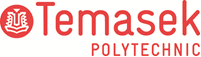

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Lean Kah Bao (2404787J)
* Tutorial Group                : PC04
* Tutor						    : Effendi Baba
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: Predict laptop Price

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILEPATH = "laptop_price.csv"
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
## Check for missing data
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
## Describe data distribution
df.describe(include="all")

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


## 2.3 Data Visualization

### 2.3.1.2 Understanding distribution of features

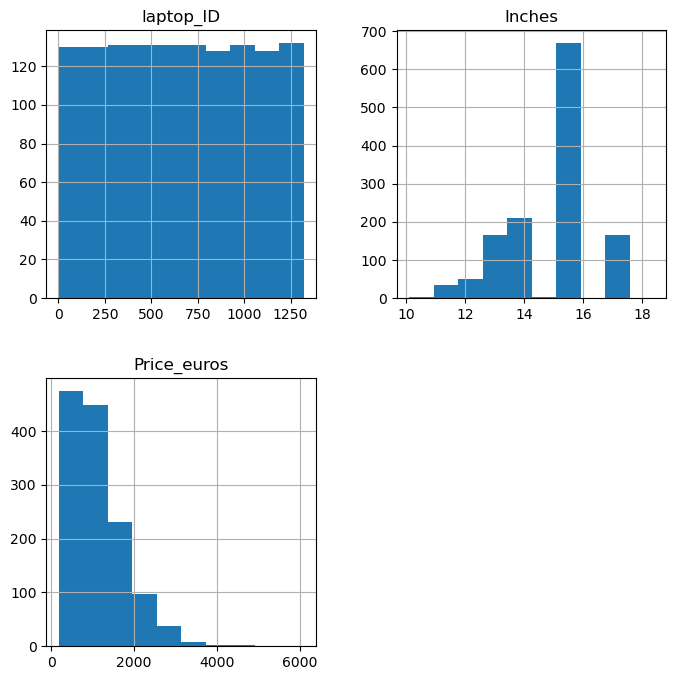

In [7]:
## Understanding distribution of features
df.hist(figsize=(8,8))
plt.show()

<span style = "color:#42bef5;">

Laptop_ID: It has a uniform distrivution, with values distributed evenly across the range. Since this is just an ID, it provide no predictive value.

Inches: The distribution is multimodal, revealing a clear preference for the standard screen size. With the talles at around 15.6 inches, which represents the vast majority of the datasets

Price_euros: the graph is significantly right-skewed. While most laptops are concentrated in the lower to mid-price range. There is also a long tail towards the right. Which indicates a few very expense high-end models. 


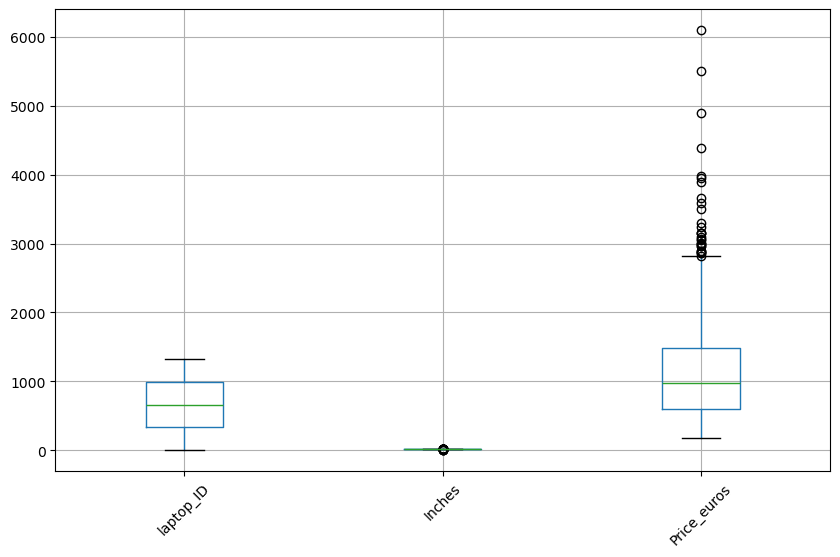

In [8]:
df.boxplot(rot=45, figsize=(10,6))
plt.show()

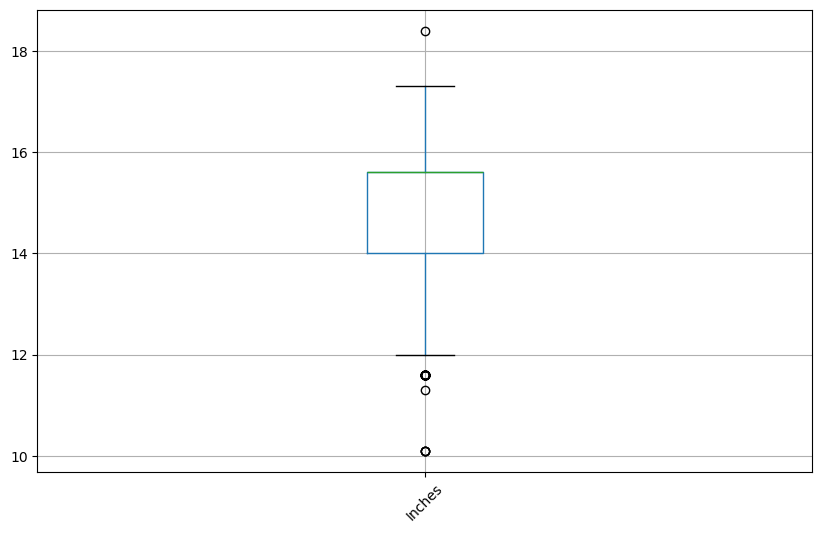

In [9]:
df[['Inches']].boxplot(rot=45, figsize=(10,6))
plt.show()

<span style = "color:#42cef5;">

Laptop_ID: This feature shows a uniform distrivution with no outliers, confirming that each data has unique label. 

Inches: The distribution is multimodal, with a median the third quartile both sitting at 15.6 inches. This indicates a high concentration of laptops at a specific size. There are outliers on both ends, a high-end olier near 18.2 inches and low-end outliers around 10 to 11.8 inches. 

Price_euros: The median is around 1,000 euros with the Interquartile Range falling between 600 and 1,500 euros. It also have an extreme outliers reaching 4,300 euros and higher. 

### 2.3.2 Understanding relationship between variables

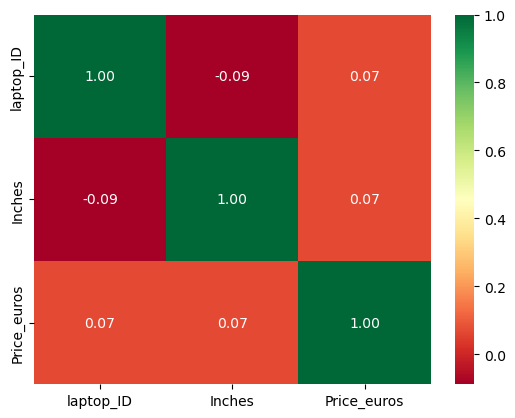

In [10]:
## Understanding relationship between variables
col_numeric = df.select_dtypes(include=['float', 'int']).columns
df_corr = df[col_numeric].corr()

# Added 'annot=True' to show numbers and 'fmt' to round them
sns.heatmap(df_corr, cmap='RdYlGn', annot=True, fmt='.2f')

plt.show()

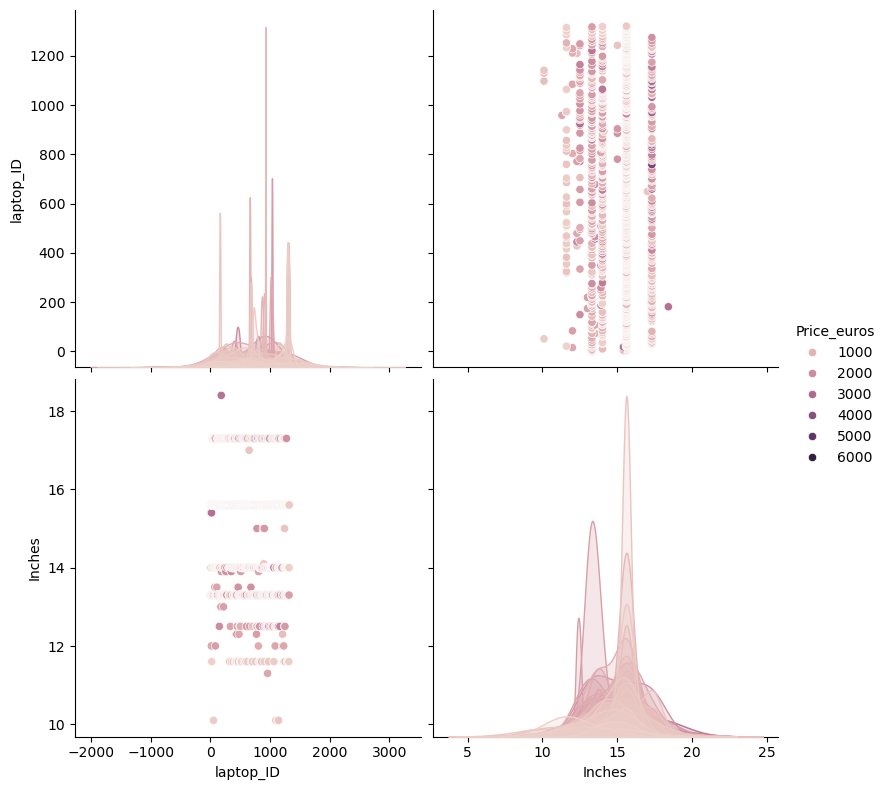

In [11]:
sns.pairplot(df, hue="Price_euros", height=4, aspect=1)
plt.show()

<span style = "color:#42bef5;">

The correlations has a very weak correlation of less than 0.01 correlation. 

Price vs Inches: there is a very weak positive correlation. This suggest that while larger laptop are generally slightly more expensive, screen size alone in not a strong predictor of price in this dataset.

laptop_ID: This feature is noise as is just a label, it has no relationship with the other feature. 


# 3. Data Preparation

## 3.1 Data Cleaning

In [12]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

<span style = "color:#42bef5;">

By removing the units, it allow for the calculation of mathematical distribution and correlations. Which is impossible with raw text. 

In [13]:
y = df["Price_euros"]


col_irrelevant = [
    "Price_euros",
    'laptop_ID',
    'Product'
]

# 3. Create X
x = df.drop(col_irrelevant, axis=1)
x


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19


In [14]:
# 4. One-Hot Encoding
x = pd.get_dummies(x, drop_first=True)

print(f"Original Columns: {x.shape[1]}")
print(f"New Columns (after One-Hot): {x.shape[1]}")

x

Original Columns: 337
New Columns (after One-Hot): 337


,Inches,Ram,Weight,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.80,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1299,13.3,16,1.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1300,14.0,2,1.50,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1301,15.6,6,2.19,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


## 3.2 Train-Test Split

In [15]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

test_size = 0.3
random_state = 2026
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=random_state
)

# 4. Modelling

### 4.2 Train Model

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2026)
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2026
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2026)
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=2026)
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

In [31]:
## Evaluate model
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [36]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Results:\n"
      f"RMSE: {rmse:.4f}\n"
      f"MAE: {mae:.4f}\n"
      f"R2:  {r2:.4f}")

Linear Regression Results:
RMSE: 325.2411
MAE: 212.6761
R2:  0.8107


<span style = "color:#42bef5;">

The model show a strong correlation with R2 score of 0.81. Despite the high R2, the MAE of 212.68 shows that the predictions typically deviate from the actual price by approximatly 213 euros. The significant high RMSE of 325.2411 shows that the model struggles with extreme outliers, likely due to high-end gaming and workstation laptops that are price above 4,000 euros. 


In [35]:
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree Regressor Results:\n"
      f"RMSE: {rmse:.4f}\n"
      f"MAE: {mae:.4f}\n"
      f"R2:  {r2:.4f}")

Decision Tree Regressor Results:
RMSE: 410.0616
MAE: 248.0757
R2:  0.6991


<span style = "color:#42bef5;">

The model has a moderate R2 score of 0.6999, significantly underperformed compared to the linear Regression. With an RMSE of 410.0616, this model produced the largest error of all the tested algorithm. An MAE of 248 indicated that on average the prediction is off by 248 euros. Due to the high RMSE, the model is unable to handle the high-end outlier laptops in the dataset. 


In [34]:
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor Results:\n"
      f"RMSE: {rmse:.4f}\n"
      f"MAE: {mae:.4f}\n"
      f"R2:  {r2:.4f}")

Random Forest Regressor Results:
RMSE: 330.6639
MAE: 202.9272
R2:  0.8044


<span style = "color:#42bef5;">

The Random Forest has a high R2 score of 0.8044, showing a high significant amount of variance in laptop prices. With the lowest MAE of 202.93 amoung the tested models, indicating on average the prediction is off by 203 euros. Although the this model has a high RMSE of 330.6639, it is still better than the Linear Regression RMSE score. Because of its lowest MAE score compared to other model it is the most reliable model because it has the lowest indidual error in a single decision tree. 

In [32]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor Results:\n"
      f"RMSE: {rmse:.4f}\n"
      f"MAE: {mae:.4f}\n"
      f"R2:  {r2:.4f}")

Gradient Boosting Regressor Results:
RMSE: 343.7998
MAE: 235.4545
R2:  0.7885


<span style = "color:#42bef5;">

The model has a strong R2 score of 0.7885. It has a MAE of 235.45, meaning the model prediction are on average off by around 235 euros. The RMSE of 343.7998.This suggest that it is still bad however it can handles price outlier moderate success compared to the other models. 


In [27]:
import pandas as pd
import numpy as np

# 1. Define your "Raw" laptop details here
laptop_specs = {
    'Inches': 15.6,
    'Ram': 16,
    'Weight': 2.1,
    'Company': 'Company_Dell',
    'TypeName': 'TypeName_Gaming',
    'ScreenResolution': 'ScreenResolution_Full HD 1920x1080',
    'Cpu': 'Cpu_Intel Core i7 7700HQ 2.8GHz',
    'Memory': 'Memory_512GB SSD',
    'Gpu': 'Gpu_Nvidia GeForce GTX 1050',
    'OpSys': 'OpSys_Windows 10'
}

# 2. Create an empty DataFrame with all 274 columns set to 0
columns = ['Inches', 'Ram', 'Weight', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'ScreenResolution_1440x900', 'ScreenResolution_1600x900', 'ScreenResolution_1920x1080', 'ScreenResolution_2560x1440', 'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160', 'ScreenResolution_4K Ultra HD 3840x2160', 'ScreenResolution_Full HD / Touchscreen 1920x1080', 'ScreenResolution_Full HD 1920x1080', 'ScreenResolution_IPS Panel 1366x768', 'ScreenResolution_IPS Panel 2560x1440', 'ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160', 'ScreenResolution_IPS Panel 4K Ultra HD 3840x2160', 'ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080', 'ScreenResolution_IPS Panel Full HD 1366x768', 'ScreenResolution_IPS Panel Full HD 1920x1080', 'ScreenResolution_IPS Panel Full HD 1920x1200', 'ScreenResolution_IPS Panel Full HD 2160x1440', 'ScreenResolution_IPS Panel Full HD 2560x1440', 'ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800', 'ScreenResolution_IPS Panel Quad HD+ 2560x1440', 'ScreenResolution_IPS Panel Quad HD+ 3200x1800', 'ScreenResolution_IPS Panel Retina Display 2304x1440', 'ScreenResolution_IPS Panel Retina Display 2560x1600', 'ScreenResolution_IPS Panel Retina Display 2736x1824', 'ScreenResolution_IPS Panel Retina Display 2880x1800', 'ScreenResolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160', 'ScreenResolution_IPS Panel Touchscreen 1366x768', 'ScreenResolution_IPS Panel Touchscreen 1920x1200', 'ScreenResolution_IPS Panel Touchscreen 2400x1600', 'ScreenResolution_IPS Panel Touchscreen 2560x1440', 'ScreenResolution_Quad HD+ / Touchscreen 3200x1800', 'ScreenResolution_Quad HD+ 3200x1800', 'ScreenResolution_Touchscreen / 4K Ultra HD 3840x2160', 'ScreenResolution_Touchscreen / Full HD 1920x1080', 'ScreenResolution_Touchscreen / Quad HD+ 3200x1800', 'ScreenResolution_Touchscreen 1366x768', 'ScreenResolution_Touchscreen 2256x1504', 'ScreenResolution_Touchscreen 2400x1600', 'ScreenResolution_Touchscreen 2560x1440', 'Cpu_AMD A10-Series 9620P 2.5GHz', 'Cpu_AMD A10-Series A10-9620P 2.5GHz', 'Cpu_AMD A12-Series 9700P 2.5GHz', 'Cpu_AMD A12-Series 9720P 2.7GHz', 'Cpu_AMD A12-Series 9720P 3.6GHz', 'Cpu_AMD A4-Series 7210 2.2GHz', 'Cpu_AMD A6-Series 7310 2GHz', 'Cpu_AMD A6-Series 9220 2.5GHz', 'Cpu_AMD A6-Series 9220 2.9GHz', 'Cpu_AMD A6-Series A6-9220 2.5GHz', 'Cpu_AMD A8-Series 7410 2.2GHz', 'Cpu_AMD A9-Series 9410 2.9GHz', 'Cpu_AMD A9-Series 9420 2.9GHz', 'Cpu_AMD A9-Series 9420 3GHz', 'Cpu_AMD A9-Series A9-9420 3GHz', 'Cpu_AMD E-Series 6110 1.5GHz', 'Cpu_AMD E-Series 7110 1.8GHz', 'Cpu_AMD E-Series 9000 2.2GHz', 'Cpu_AMD E-Series 9000e 1.5GHz', 'Cpu_AMD E-Series E2-6110 1.5GHz', 'Cpu_AMD E-Series E2-9000 2.2GHz', 'Cpu_AMD E-Series E2-9000e 1.5GHz', 'Cpu_AMD FX 8800P 2.1GHz', 'Cpu_AMD FX 9830P 3GHz', 'Cpu_AMD Ryzen 1600 3.2GHz', 'Cpu_AMD Ryzen 1700 3GHz', 'Cpu_Intel Atom X5-Z8350 1.44GHz', 'Cpu_Intel Atom Z8350 1.92GHz', 'Cpu_Intel Atom x5-Z8300 1.44GHz', 'Cpu_Intel Atom x5-Z8350 1.44GHz', 'Cpu_Intel Atom x5-Z8550 1.44GHz', 'Cpu_Intel Celeron Dual Core 3205U 1.5GHz', 'Cpu_Intel Celeron Dual Core 3855U 1.6GHz', 'Cpu_Intel Celeron Dual Core N3050 1.6GHz', 'Cpu_Intel Celeron Dual Core N3060 1.60GHz', 'Cpu_Intel Celeron Dual Core N3060 1.6GHz', 'Cpu_Intel Celeron Dual Core N3350 1.1GHz', 'Cpu_Intel Celeron Dual Core N3350 2.0GHz', 'Cpu_Intel Celeron Dual Core N3350 2GHz', 'Cpu_Intel Celeron Quad Core N3160 1.6GHz', 'Cpu_Intel Celeron Quad Core N3450 1.1GHz', 'Cpu_Intel Celeron Quad Core N3710 1.6GHz', 'Cpu_Intel Core M 1.1GHz', 'Cpu_Intel Core M 1.2GHz', 'Cpu_Intel Core M 6Y30 0.9GHz', 'Cpu_Intel Core M 6Y54 1.1GHz', 'Cpu_Intel Core M 6Y75 1.2GHz', 'Cpu_Intel Core M 7Y30 1.0GHz', 'Cpu_Intel Core M M3-6Y30 0.9GHz', 'Cpu_Intel Core M M7-6Y75 1.2GHz', 'Cpu_Intel Core M m3 1.2GHz', 'Cpu_Intel Core M m3-7Y30 2.2GHz', 'Cpu_Intel Core M m7-6Y75 1.2GHz', 'Cpu_Intel Core i3 6006U 2.0GHz', 'Cpu_Intel Core i3 6006U 2.2GHz', 'Cpu_Intel Core i3 6006U 2GHz', 'Cpu_Intel Core i3 6100U 2.1GHz', 'Cpu_Intel Core i3 6100U 2.3GHz', 'Cpu_Intel Core i3 7100U 2.4GHz', 'Cpu_Intel Core i3 7130U 2.7GHz', 'Cpu_Intel Core i5 1.3GHz', 'Cpu_Intel Core i5 1.6GHz', 'Cpu_Intel Core i5 1.8GHz', 'Cpu_Intel Core i5 2.0GHz', 'Cpu_Intel Core i5 2.3GHz', 'Cpu_Intel Core i5 2.9GHz', 'Cpu_Intel Core i5 3.1GHz', 'Cpu_Intel Core i5 6200U 2.3GHz', 'Cpu_Intel Core i5 6260U 1.8GHz', 'Cpu_Intel Core i5 6300HQ 2.3GHz', 'Cpu_Intel Core i5 6300U 2.4GHz', 'Cpu_Intel Core i5 6440HQ 2.6GHz', 'Cpu_Intel Core i5 7200U 2.50GHz', 'Cpu_Intel Core i5 7200U 2.5GHz', 'Cpu_Intel Core i5 7200U 2.70GHz', 'Cpu_Intel Core i5 7200U 2.7GHz', 'Cpu_Intel Core i5 7300HQ 2.5GHz', 'Cpu_Intel Core i5 7300U 2.6GHz', 'Cpu_Intel Core i5 7440HQ 2.8GHz', 'Cpu_Intel Core i5 7500U 2.7GHz', 'Cpu_Intel Core i5 7Y54 1.2GHz', 'Cpu_Intel Core i5 7Y57 1.2GHz', 'Cpu_Intel Core i5 8250U 1.6GHz', 'Cpu_Intel Core i7 2.2GHz', 'Cpu_Intel Core i7 2.7GHz', 'Cpu_Intel Core i7 2.8GHz', 'Cpu_Intel Core i7 2.9GHz', 'Cpu_Intel Core i7 6500U 2.50GHz', 'Cpu_Intel Core i7 6500U 2.5GHz', 'Cpu_Intel Core i7 6560U 2.2GHz', 'Cpu_Intel Core i7 6600U 2.6GHz', 'Cpu_Intel Core i7 6700HQ 2.6GHz', 'Cpu_Intel Core i7 6820HK 2.7GHz', 'Cpu_Intel Core i7 6820HQ 2.7GHz', 'Cpu_Intel Core i7 6920HQ 2.9GHz', 'Cpu_Intel Core i7 7500U 2.5GHz', 'Cpu_Intel Core i7 7500U 2.7GHz', 'Cpu_Intel Core i7 7560U 2.4GHz', 'Cpu_Intel Core i7 7600U 2.8GHz', 'Cpu_Intel Core i7 7660U 2.5GHz', 'Cpu_Intel Core i7 7700HQ 2.7GHz', 'Cpu_Intel Core i7 7700HQ 2.8GHz', 'Cpu_Intel Core i7 7820HK 2.9GHz', 'Cpu_Intel Core i7 7820HQ 2.9GHz', 'Cpu_Intel Core i7 7Y75 1.3GHz', 'Cpu_Intel Core i7 8550U 1.8GHz', 'Cpu_Intel Core i7 8650U 1.9GHz', 'Cpu_Intel Pentium Dual Core 4405U 2.1GHz', 'Cpu_Intel Pentium Dual Core 4405Y 1.5GHz', 'Cpu_Intel Pentium Dual Core N4200 1.1GHz', 'Cpu_Intel Pentium Quad Core N3700 1.6GHz', 'Cpu_Intel Pentium Quad Core N3710 1.6GHz', 'Cpu_Intel Pentium Quad Core N4200 1.1GHz', 'Cpu_Intel Xeon E3-1505M V6 3GHz', 'Cpu_Intel Xeon E3-1535M v5 2.9GHz', 'Cpu_Intel Xeon E3-1535M v6 3.1GHz', 'Cpu_Samsung Cortex A72&A53 2.0GHz', 'Memory_1.0TB Hybrid', 'Memory_128GB Flash Storage', 'Memory_128GB HDD', 'Memory_128GB SSD', 'Memory_128GB SSD +  1TB HDD', 'Memory_128GB SSD +  2TB HDD', 'Memory_16GB Flash Storage', 'Memory_16GB SSD', 'Memory_180GB SSD', 'Memory_1TB HDD', 'Memory_1TB HDD +  1TB HDD', 'Memory_1TB SSD', 'Memory_1TB SSD +  1TB HDD', 'Memory_240GB SSD', 'Memory_256GB Flash Storage', 'Memory_256GB SSD', 'Memory_256GB SSD +  1.0TB Hybrid', 'Memory_256GB SSD +  1TB HDD', 'Memory_256GB SSD +  256GB SSD', 'Memory_256GB SSD +  2TB HDD', 'Memory_256GB SSD +  500GB HDD', 'Memory_2TB HDD', 'Memory_32GB Flash Storage', 'Memory_32GB HDD', 'Memory_32GB SSD', 'Memory_500GB HDD', 'Memory_508GB Hybrid', 'Memory_512GB Flash Storage', 'Memory_512GB SSD', 'Memory_512GB SSD +  1.0TB Hybrid', 'Memory_512GB SSD +  1TB HDD', 'Memory_512GB SSD +  256GB SSD', 'Memory_512GB SSD +  2TB HDD', 'Memory_512GB SSD +  512GB SSD', 'Memory_64GB Flash Storage', 'Memory_64GB Flash Storage +  1TB HDD', 'Memory_64GB SSD', 'Memory_8GB SSD', 'Gpu_AMD FirePro W4190M ', 'Gpu_AMD FirePro W5130M', 'Gpu_AMD FirePro W6150M', 'Gpu_AMD R17M-M1-70', 'Gpu_AMD R4 Graphics', 'Gpu_AMD Radeon 520', 'Gpu_AMD Radeon 530', 'Gpu_AMD Radeon 540', 'Gpu_AMD Radeon Pro 455', 'Gpu_AMD Radeon Pro 555', 'Gpu_AMD Radeon Pro 560', 'Gpu_AMD Radeon R2', 'Gpu_AMD Radeon R2 Graphics', 'Gpu_AMD Radeon R3', 'Gpu_AMD Radeon R4', 'Gpu_AMD Radeon R4 Graphics', 'Gpu_AMD Radeon R5', 'Gpu_AMD Radeon R5 430', 'Gpu_AMD Radeon R5 520', 'Gpu_AMD Radeon R5 M315', 'Gpu_AMD Radeon R5 M330', 'Gpu_AMD Radeon R5 M420', 'Gpu_AMD Radeon R5 M420X', 'Gpu_AMD Radeon R5 M430', 'Gpu_AMD Radeon R7', 'Gpu_AMD Radeon R7 Graphics', 'Gpu_AMD Radeon R7 M360', 'Gpu_AMD Radeon R7 M365X', 'Gpu_AMD Radeon R7 M440', 'Gpu_AMD Radeon R7 M445', 'Gpu_AMD Radeon R7 M460', 'Gpu_AMD Radeon R7 M465', 'Gpu_AMD Radeon R9 M385', 'Gpu_AMD Radeon RX 540', 'Gpu_AMD Radeon RX 550', 'Gpu_AMD Radeon RX 560', 'Gpu_AMD Radeon RX 580', 'Gpu_ARM Mali T860 MP4', 'Gpu_Intel Graphics 620', 'Gpu_Intel HD Graphics', 'Gpu_Intel HD Graphics 400', 'Gpu_Intel HD Graphics 405', 'Gpu_Intel HD Graphics 500', 'Gpu_Intel HD Graphics 505', 'Gpu_Intel HD Graphics 510', 'Gpu_Intel HD Graphics 515', 'Gpu_Intel HD Graphics 520', 'Gpu_Intel HD Graphics 530', 'Gpu_Intel HD Graphics 5300', 'Gpu_Intel HD Graphics 540', 'Gpu_Intel HD Graphics 6000', 'Gpu_Intel HD Graphics 615', 'Gpu_Intel HD Graphics 620', 'Gpu_Intel HD Graphics 620 ', 'Gpu_Intel HD Graphics 630', 'Gpu_Intel Iris Graphics 540', 'Gpu_Intel Iris Graphics 550', 'Gpu_Intel Iris Plus Graphics 640', 'Gpu_Intel Iris Plus Graphics 650', 'Gpu_Intel Iris Pro Graphics', 'Gpu_Intel UHD Graphics 620', 'Gpu_Nvidia GTX 980 SLI', 'Gpu_Nvidia GeForce 150MX', 'Gpu_Nvidia GeForce 920', 'Gpu_Nvidia GeForce 920M', 'Gpu_Nvidia GeForce 920MX', 'Gpu_Nvidia GeForce 920MX ', 'Gpu_Nvidia GeForce 930M', 'Gpu_Nvidia GeForce 930MX', 'Gpu_Nvidia GeForce 930MX ', 'Gpu_Nvidia GeForce 940M', 'Gpu_Nvidia GeForce 940MX', 'Gpu_Nvidia GeForce 960M', 'Gpu_Nvidia GeForce GT 940MX', 'Gpu_Nvidia GeForce GTX 1050', 'Gpu_Nvidia GeForce GTX 1050 Ti', 'Gpu_Nvidia GeForce GTX 1050M', 'Gpu_Nvidia GeForce GTX 1050Ti', 'Gpu_Nvidia GeForce GTX 1060', 'Gpu_Nvidia GeForce GTX 1070', 'Gpu_Nvidia GeForce GTX 1070M', 'Gpu_Nvidia GeForce GTX 1080', 'Gpu_Nvidia GeForce GTX 930MX', 'Gpu_Nvidia GeForce GTX 940M', 'Gpu_Nvidia GeForce GTX 940MX', 'Gpu_Nvidia GeForce GTX 950M', 'Gpu_Nvidia GeForce GTX 960', 'Gpu_Nvidia GeForce GTX 960<U+039C>', 'Gpu_Nvidia GeForce GTX 960M', 'Gpu_Nvidia GeForce GTX 965M', 'Gpu_Nvidia GeForce GTX 970M', 'Gpu_Nvidia GeForce GTX 980 ', 'Gpu_Nvidia GeForce GTX 980M', 'Gpu_Nvidia GeForce GTX1050 Ti', 'Gpu_Nvidia GeForce GTX1060', 'Gpu_Nvidia GeForce GTX1080', 'Gpu_Nvidia GeForce MX130', 'Gpu_Nvidia GeForce MX150', 'Gpu_Nvidia Quadro 3000M', 'Gpu_Nvidia Quadro M1000M', 'Gpu_Nvidia Quadro M1200', 'Gpu_Nvidia Quadro M2000M', 'Gpu_Nvidia Quadro M2200', 'Gpu_Nvidia Quadro M2200M', 'Gpu_Nvidia Quadro M3000M', 'Gpu_Nvidia Quadro M500M', 'Gpu_Nvidia Quadro M520M', 'Gpu_Nvidia Quadro M620', 'Gpu_Nvidia Quadro M620M', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS']

X_test_laptop = pd.DataFrame(np.zeros((1, len(columns))), columns=columns)

# 3. Fill the numeric data
X_test_laptop['Inches'] = laptop_specs['Inches']
X_test_laptop['Ram'] = laptop_specs['Ram']
X_test_laptop['Weight'] = laptop_specs['Weight']

# 4. Set the specific categorical columns to 1
X_test_laptop[laptop_specs['Company']] = 1
X_test_laptop[laptop_specs['TypeName']] = 1
X_test_laptop[laptop_specs['ScreenResolution']] = 1
X_test_laptop[laptop_specs['Cpu']] = 1
X_test_laptop[laptop_specs['Memory']] = 1
X_test_laptop[laptop_specs['Gpu']] = 1
X_test_laptop[laptop_specs['OpSys']] = 1

# 5. Predict with your best model (e.g., Random Forest 'rfr' or Linear Regression 'lr')
price_prediction = lr.predict(X_test_laptop)

print(f"The predicted price for this laptop is: €{price_prediction[0]:.2f}")

The predicted price for this laptop is: €1500.16


In [37]:
# Store the random forest scores in variables
base_r2 = r2
base_mae = mae
base_rmse = rmse

## Iterative model development


In [ ]:
## Further feature engineering / feature selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
rf = RandomForestRegressor(random_state=2026)

param_dist = {
    'n_estimators': randint(50,100),      # Number of trees (More = usually better)
    # 'criterion': ['gini', 'entropy'], # Function to measure quality of split
    'criterion': ['friedman_mse', 'squared_error'],
    # 'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Speed of learning (Lower = more precise)
    'max_depth': randint(3, 10),                 # How deep each tree goes (Deeper = complex)
    'min_samples_split': randint(30, 50),           # Minimum samples to create a split
    # 'max_samples': uniform(0.6, 0.4),            # % of data used to train each tree
    # 'subsample': [0.8, 0.9, 1.0]               # % of data used for each tree
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,         # Try 20 random combinations (Change this to 50 for better results)
    cv=5,              # Cross-validation (Test each combo 3 times to be sure)
    scoring = 'r2',
    n_jobs=-1,          # Use all CPU cores (Faster)
    # verbose=1,         # Show progress bar
    random_state=2026   # Lock the randomness so you get same results as me
)

# 6. Run the Search (This might take a minute)
rf_random.fit(X_train, y_train)

## Obtain best parameters and best estimator
best_rf_params = rf_random.best_params_
best_rf_gb = rf_random.best_estimator_
print("Best Parameters: ", best_rf_params)
print("Best Estimator: ", best_rf_gb)


Best Parameters:  {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 38, 'n_estimators': 50}
Best Estimator:  RandomForestRegressor(max_depth=9, min_samples_split=38, n_estimators=50,
                      random_state=2026)


In [38]:
# 1. Predict using the best model found by Random Search
y_pred_rf = best_rf_gb.predict(X_test)

# 2. Calculate Metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = root_mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)



# 3. Print Results
print(f"Fine-Tuned Random Forest Results:\n"
      f"R2 Score: {rf_r2:.4f}\n"
      f"MAE:      {rf_mae:.4f}\n"
      f"RMSE:     {rf_rmse:.4f}")

Fine-Tuned Random Forest Results:
R2 Score: 0.7425
MAE:      251.5245
RMSE:     379.3810


In [39]:
# Store the fine-tuned results in variables
ft_r2 = rf_r2
ft_mae = rf_mae
ft_rmse = rf_rmse

In [42]:
import pandas as pd

# 1. Create a dictionary with the stored variables
comparison_data = {
    'Metric': ['R2 Score (Accuracy)', 'MAE (Average Error)', 'RMSE (Outlier Sensitivity)'],
    'Base Model': [base_r2, base_mae, base_rmse],
    'Fine-Tuned Model': [ft_r2, ft_mae, ft_rmse]
}

# 2. Convert to a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# 3. Add a 'Difference' column to see the exact improvement
comparison_df['Difference'] = comparison_df['Fine-Tuned Model'] - comparison_df['Base Model']

# 4. Display the table rounded for cleanliness
display(comparison_df.round(4))

,Metric,Base Model,Fine-Tuned Model,Difference
0,R2 Score (Accuracy),0.8107,0.7425,-0.0683
1,MAE (Average Error),212.6761,251.5245,38.8484
2,RMSE (Outlier Sensitivity),325.2411,379.3810,54.1399


<span style = "color:#42bef5;">

After fine tuning, the model become worse as the R2 reduce by 0.0683. The MAE score has increase by 38.8484. The RMSE score has increase by 54.1399.

To improve the model we can introduce feature engineering to allow a more efficent column to be used to predict.

## Feature Engineering


In [50]:
# Extract X and Y dimensions using Regex pattern (\d+)x(\d+)
res_data = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')

df['X_res'] = res_data[0].astype(int)
df['Y_res'] = res_data[1].astype(int)

# Now calculate PPI (Pixels Per Inch)
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5) / df['Inches']

# Check the result
print(df[['ScreenResolution', 'PPI']].head(15))

                      ScreenResolution         PPI
0   IPS Panel Retina Display 2560x1600  226.983005
1                             1440x900  127.677940
2                    Full HD 1920x1080  141.211998
3   IPS Panel Retina Display 2880x1800  220.534624
4   IPS Panel Retina Display 2560x1600  226.983005
5                             1366x768  100.454670
6   IPS Panel Retina Display 2880x1800  220.534624
7                             1440x900  127.677940
8                    Full HD 1920x1080  157.350512
9          IPS Panel Full HD 1920x1080  157.350512
10                            1366x768  100.454670
11                   Full HD 1920x1080  141.211998
12  IPS Panel Retina Display 2880x1800  220.534624
13                   Full HD 1920x1080  141.211998
14  IPS Panel Retina Display 2304x1440  226.415547


<span style = "color:#42bef5;">

By replacing a messy string with continuous variable to a a single numerical feature that represent the screen quality. It reduces the complexity and help the algorithm identify the trend more efficiently.  Using PPI it is able to capture the mathematical relationship between resolution and size, allowing the model to distinguish sharp and grainy display. 

In [51]:
# Simplify CPU (Group into i3, i5, i7, AMD, etc.)
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        elif text.split()[0] == 'AMD':
            return 'AMD Processor'
        else:
            return 'Other Processor'

# Extract first 3 words "Intel Core i5"
df['Cpu_Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[:3]))
df['Cpu_Brand'] = df['Cpu_Name'].apply(fetch_processor)

# Check the result
print(df[['Cpu', 'Cpu_Brand']].head(15))

                           Cpu              Cpu_Brand
0         Intel Core i5 2.3GHz          Intel Core i5
1         Intel Core i5 1.8GHz          Intel Core i5
2   Intel Core i5 7200U 2.5GHz          Intel Core i5
3         Intel Core i7 2.7GHz          Intel Core i7
4         Intel Core i5 3.1GHz          Intel Core i5
5      AMD A9-Series 9420 3GHz          AMD Processor
6         Intel Core i7 2.2GHz          Intel Core i7
7         Intel Core i5 1.8GHz          Intel Core i5
8   Intel Core i7 8550U 1.8GHz          Intel Core i7
9   Intel Core i5 8250U 1.6GHz          Intel Core i5
10  Intel Core i5 7200U 2.5GHz          Intel Core i5
11    Intel Core i3 6006U 2GHz          Intel Core i3
12        Intel Core i7 2.8GHz          Intel Core i7
13    Intel Core i3 6006U 2GHz          Intel Core i3
14      Intel Core M m3 1.2GHz  Other Intel Processor


<span style = "color:#42bef5;">

Grouping CPU names reduce noise and prevent the model from over-fitting especially specific processor versions. This simiples the feature column and ensure the model identifies the market trend rather tahn getting lost in minor naming cariations. 

In [52]:
def discover_memory_types(text):
    # 1. Remove the specific units and symbols we know are noise
    text = text.replace('GB', '').replace('TB', '').replace('+', '')
    
    # 2. Remove ALL numbers (digits 0-9) and decimal points
    # This loop keeps a character only if it is NOT a digit and NOT a period
    text = "".join([char for char in text if not char.isdigit() and char != '.'])
    
    # 3. Clean up the extra spaces left behind
    # "  SSD   " -> "SSD"
    return " ".join(text.split())

# Apply the discovery function
unique_raw_types = df['Memory'].apply(discover_memory_types).unique()

print("Discovered Memory Types:")
print(unique_raw_types)

Discovered Memory Types:
['SSD' 'Flash Storage' 'HDD' 'SSD HDD' 'SSD SSD' 'Hybrid'
 'Flash Storage HDD' 'HDD HDD' 'SSD Hybrid']


In [53]:
# Simplified Memory Cleaning Function
def clean_memory(memory_str):
    # 1. Standardize everything to 'GB' and remove the unit text
    # "1TB HDD" becomes "1000 HDD", "128GB SSD" becomes "128 SSD"
    s = memory_str.replace('1.0TB', '1000GB').replace('1TB', '1000GB').replace('2TB', '2000GB').replace('GB', '')
    
    ssd = 0
    hdd = 0
    
    # 2. Split by '+' to handle dual drives (e.g., "128 SSD + 1000 HDD")
    for part in s.split('+'):
        part = part.strip() # Remove extra spaces
        
        # 3. Get the size (It is always the first word now)
        try:
            size = int(part.split()[0])
        except:
            size = 0
            
        # 4. Add to correct category
        if 'SSD' in part or 'Flash Storage' in part:
            ssd += size
        elif 'HDD' in part or 'Hybrid' in part:
            hdd += size
        else:
            pass # Ignore other types for now
            
    return pd.Series([ssd, hdd])

# Apply the function and create two new columns at once
df[['SSD', 'HDD']] = df['Memory'].apply(clean_memory)

# Check the result
print(df[['Memory', 'SSD', 'HDD']].head(20))

                 Memory  SSD   HDD
0             128GB SSD  128     0
1   128GB Flash Storage  128     0
2             256GB SSD  256     0
3             512GB SSD  512     0
4             256GB SSD  256     0
5             500GB HDD    0   500
6   256GB Flash Storage  256     0
7   256GB Flash Storage  256     0
8             512GB SSD  512     0
9             256GB SSD  256     0
10            500GB HDD    0   500
11            500GB HDD    0   500
12            256GB SSD  256     0
13            256GB SSD  256     0
14            256GB SSD  256     0
15            256GB SSD  256     0
16            256GB SSD  256     0
17            512GB SSD  512     0
18              1TB HDD    0  1000
19            128GB SSD  128     0


<span style = "color:#42bef5;">

This 

In [54]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

print(df[['Gpu', 'Gpu_Brand']].head(20))

                             Gpu Gpu_Brand
0   Intel Iris Plus Graphics 640     Intel
1         Intel HD Graphics 6000     Intel
2          Intel HD Graphics 620     Intel
3             AMD Radeon Pro 455       AMD
4   Intel Iris Plus Graphics 650     Intel
5                  AMD Radeon R5       AMD
6        Intel Iris Pro Graphics     Intel
7         Intel HD Graphics 6000     Intel
8           Nvidia GeForce MX150    Nvidia
9         Intel UHD Graphics 620     Intel
10         Intel HD Graphics 620     Intel
11         Intel HD Graphics 520     Intel
12            AMD Radeon Pro 555       AMD
13            AMD Radeon R5 M430       AMD
14         Intel HD Graphics 615     Intel
15  Intel Iris Plus Graphics 640     Intel
16            AMD Radeon R5 M430       AMD
17            AMD Radeon Pro 560       AMD
18          Nvidia GeForce 940MX    Nvidia
19        Intel UHD Graphics 620     Intel


In [55]:
def discover_opsys_types(text):
    
    # 1. Remove ALL numbers (digits 0-9) and decimal points
    # This loop keeps a character only if it is NOT a digit and NOT a period
    text = "".join([char for char in text if not char.isdigit() and char != '.'])
    
    # 2. Clean up the extra spaces left behind
    return " ".join(text.split())

# Apply the discovery function
unique_raw_types = df['OpSys'].apply(discover_opsys_types).unique()

print("Discovered OpSys Types:")
print(unique_raw_types)

Discovered OpSys Types:
['Mac' 'Others/No OS/Linux' 'Windows']


In [56]:
# Function to categorize the OS
def clean_opsys(os_name):
    if 'Windows' in os_name:
        return 'Windows'
    elif 'Mac' in os_name or 'macOS' in os_name:
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

# Apply the function
df['OpSys'] = df['OpSys'].apply(clean_opsys)

# Check the result
print(df['OpSys'].value_counts())

OpSys
Windows               1125
Others/No OS/Linux     157
Mac                     21
Name: count, dtype: int64
